In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 15

In this lecture we will:
1. Simulate the Monty Hall Problem
2. Demonstrate Deterministic and Random Sampling
3. Probability Distributions and Empirical Distributions
4. Law of Large Numbers

<br><br><br>

---

## The Monty Hall Problem 

Here we simulate the Monty Hall problem.  We break the process into three steps. 

1. Simulate the prize behind the door we picked (this is the only chance event):


In [2]:
prizes = make_array("goat", "goat", "car")

In [3]:
N = 10_000
outcomes = Table().with_column("My Choice", np.random.choice(prizes, N))
outcomes

My Choice
goat
car
car
goat
car
car
goat
car
car
goat


2. Then Monty Hall reveals a Goat behind one of the other doors.

In [4]:
outcomes = outcomes.with_column("Monty's Door", "goat")
outcomes

My Choice,Monty's Door
goat,goat
car,goat
car,goat
goat,goat
car,goat
car,goat
goat,goat
car,goat
car,goat
goat,goat


3. Finally we compute the prize behind the remaining door.  Since Monty revealed a goat the prize behind the remaining door depends only on our initial choice.  If we picked a car, then the remaining door has a goat.  Otherwise it has a car.

In [5]:
def other_door(my_choice):
    if my_choice == "car":
        return "goat"
    else:
        return "car"

In [6]:
outcomes = outcomes.with_column(
    "Other Door", outcomes.apply(other_door, "My Choice"))
outcomes

My Choice,Monty's Door,Other Door
goat,goat,car
car,goat,goat
car,goat,goat
goat,goat,car
car,goat,goat
car,goat,goat
goat,goat,car
car,goat,goat
car,goat,goat
goat,goat,car


Notice that in the above table each row has two goats and a car.  Each row simulates an outcome of playing the game.

If we stayed with our initial choice how often would we get a car?

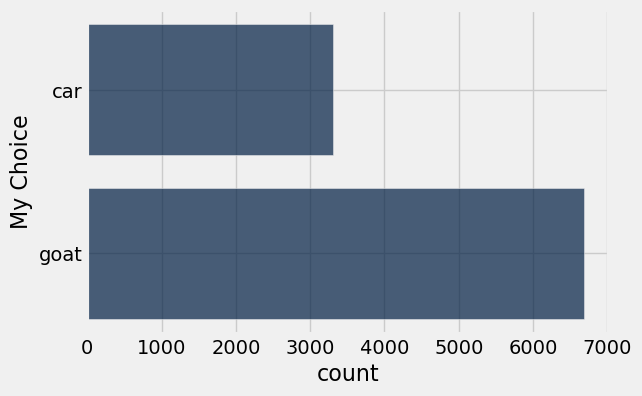

In [7]:
outcomes.group("My Choice").barh("My Choice")

If we switched to the Other door how often would we win?

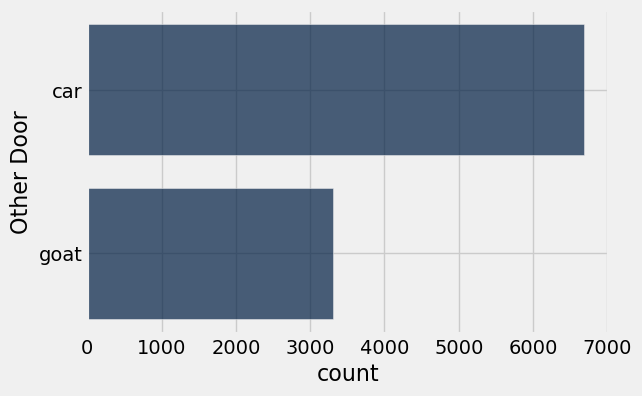

In [8]:
outcomes.group("Other Door").barh("Other Door")

Would you switch?


<br><br><br>

---
<center> Return to Slides </center>

---

<br><br><br>

<br><br><br>

---

## Random Sampling ##

We load in a dataset of all United flights national flights from 6/1/15 to 8/9/15, their destination and how long they were delayed, in minutes.

In [9]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


For each of the following, is this a deterministic or random sampling strategy?

In [10]:
united.where('Destination', 'JFK')

Row,Date,Flight Number,Destination,Delay
26,6/1/15,502,JFK,-4
33,6/1/15,637,JFK,141
39,6/1/15,704,JFK,-8
50,6/1/15,758,JFK,-5
51,6/1/15,760,JFK,352
56,6/1/15,824,JFK,3
57,6/1/15,898,JFK,290
179,6/2/15,502,JFK,0
188,6/2/15,637,JFK,202
194,6/2/15,704,JFK,-11


<br>
<details><summary>Answer</summary>

**Deterministic**

</details>
<br><br><br>

In [11]:
united.sample(3, with_replacement=True)

Row,Date,Flight Number,Destination,Delay
2682,6/18/15,1686,DCA,208
972,6/7/15,1257,ANC,-4
1932,6/13/15,1937,IAH,3


<br>
<details><summary>Answer</summary>

**Random**

</details>
<br><br><br>

In [12]:
(
    united
    .where('Destination', 'JFK')
    .sample(3, with_replacement=True)
)

Row,Date,Flight Number,Destination,Delay
10460,8/9/15,704,JFK,2
11111,8/13/15,898,JFK,-6
3358,6/23/15,824,JFK,128


<br>
<details><summary>Answer</summary>

**Random**

</details>
<br><br><br>

In [13]:
start = np.random.choice(np.arange(1000))
systematic_sample = united.take(np.arange(start, united.num_rows, 5000))
systematic_sample.show()

Row,Date,Flight Number,Destination,Delay
114,6/1/15,1586,ORD,19
5114,7/5/15,1257,ANC,-9
10114,8/6/15,1957,MCO,-2


<br>
<details><summary>Answer</summary>

**Random**

</details>
<br><br><br>


<br><br><br>

---
<center> Return to Slides </center>

---

<br><br><br>

<br><br><br>

---

## Distributions 

In [14]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


What is the **Probability Distribution** of drawing each face assuming each face is equally likely (a "fair die"):

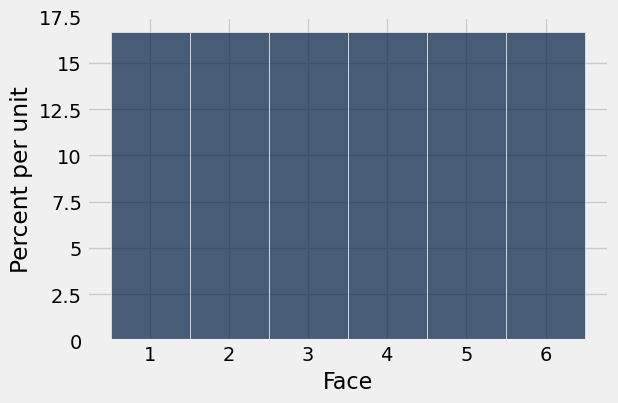

In [15]:
roll_bins = np.arange(0.5, 6.6, 1)
die.hist(bins=roll_bins)

We can sample from a table many times with replacement:

In [16]:
die.sample(3)

Face
6
6
5


We can construct an **Empirical Distribution** from our simulation:

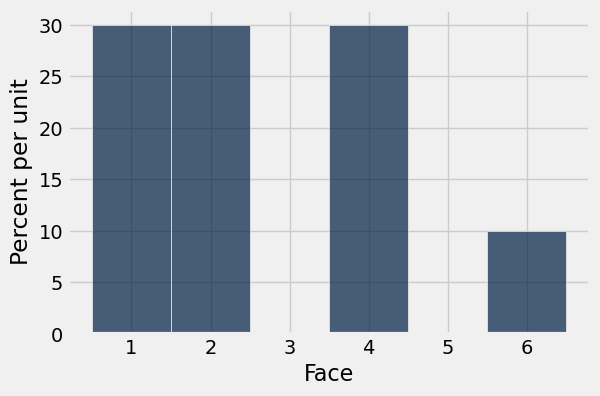

In [17]:
die.sample(10).hist(bins=roll_bins)

If we increase the number of trials in our simulation, what happens to the distribution?

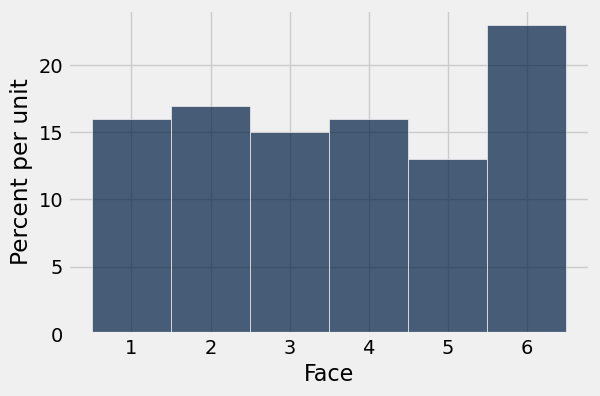

In [18]:
die.sample(100).hist(bins=roll_bins)

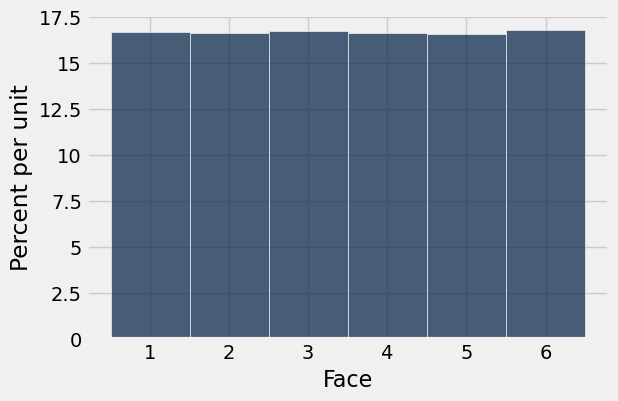

In [19]:
die.sample(100_000).hist(bins=roll_bins)


<br><br><br>

---
<center> Return to Slides </center>

---

<br><br><br>

<br><br><br>

---

## Large Random Samples 

The United flight delays is a relatively large dataset:

In [20]:
united.num_rows

13825

We can plot the distribution of delays for the population:

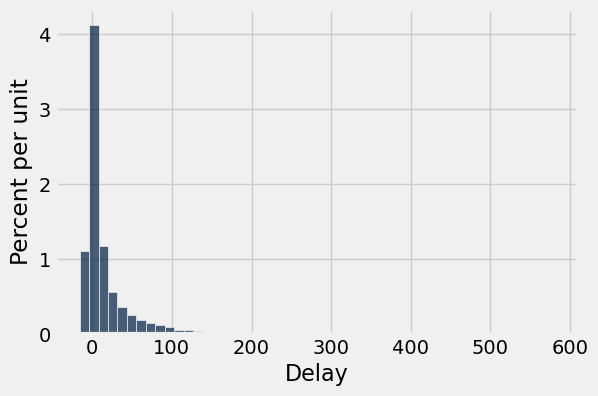

In [21]:
united.hist('Delay', bins = 50)

There appears to be some very delayed flights!

In [22]:
united.sort('Delay', descending=True)

Row,Date,Flight Number,Destination,Delay
3140,6/21/15,1964,SEA,580
3154,6/22/15,300,HNL,537
3069,6/21/15,1149,IAD,508
2888,6/20/15,353,ORD,505
12627,8/23/15,1589,ORD,458
7949,7/23/15,1960,LAX,438
3412,6/23/15,1606,ORD,430
578,6/4/15,1743,LAX,408
2474,6/17/15,1122,HNL,405
8426,7/27/15,572,ORD,385


Let's truncate the extreme flights with a histogram from -20 to 201. (More on why we do this later.)

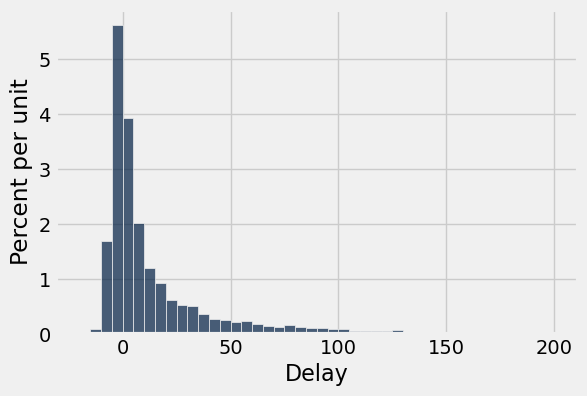

In [23]:
united_bins = np.arange(-20, 201, 5)
united.hist('Delay', bins = united_bins)

What happens if we take a small sample from this population of flights and compute the distribution of delays:

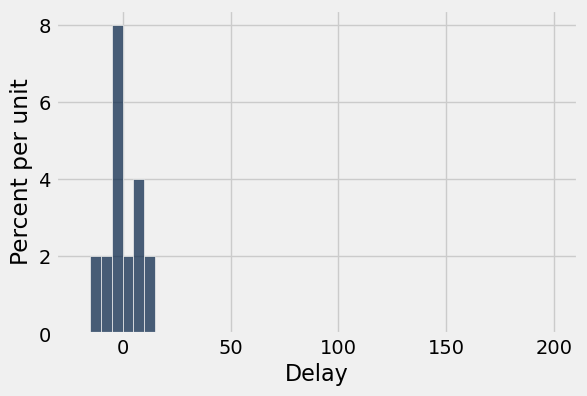

In [24]:
united.sample(10).hist('Delay', bins = united_bins)

If we increase the sample size

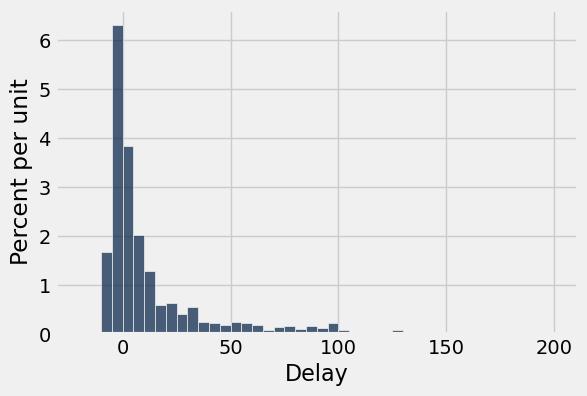

In [25]:
united.sample(1000).hist('Delay', bins = united_bins)

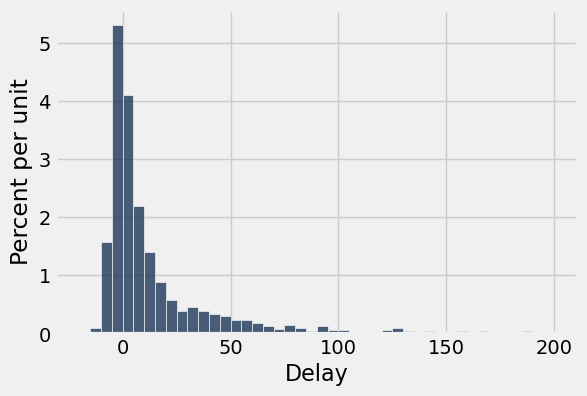

In [26]:
united.sample(2000).hist('Delay', bins = united_bins)


<br><br><br>

---
<center> Return to Slides </center>

---

<br><br><br>

## Simulating Statistics ##

Because we have access to the population (this is rare!) we can compute the parameters directly from the data.  For example, supposed we wanted to know the median flight delay:


In [27]:
np.median(united.column('Delay'))

2.0

In practice, we will often have a sample.  The median of the sample is a statistic that estimates the median of the population.

In [28]:
np.median(united.sample(10).column('Delay'))

3.0

But is it a good estimate?  It depends on the sample size (and how close we want it to be).  Here we define a function to simulate the process of computing the median from a random sample of a given size:

In [29]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [30]:
sample_median(10)

6.5

We can then simulate this sampling process many times:

In [31]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

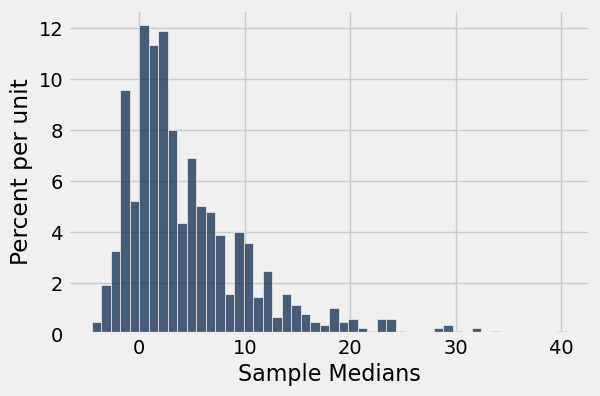

In [32]:
medians = Table().with_columns(
    "Sample Medians", sample_medians,
    "Sample Size", 10)
medians.hist("Sample Medians", bins = 50)

In [33]:
sample_medians2 = make_array()

for i in np.arange(1000):
    new_median = sample_median(1000)
    sample_medians2 = np.append(sample_medians2, new_median)

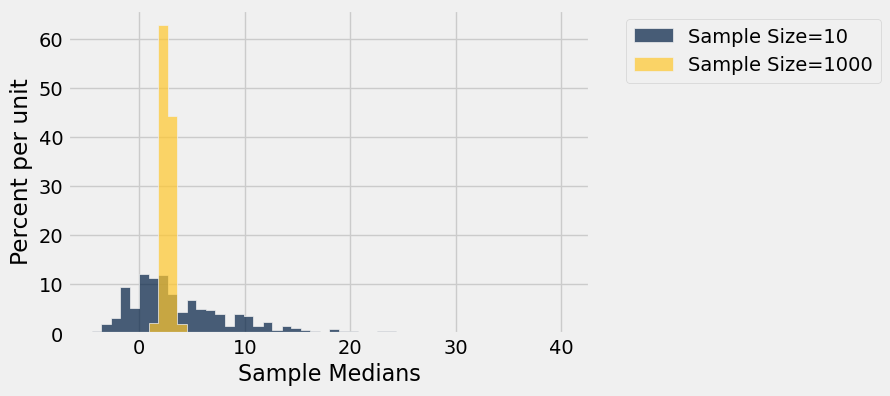

In [34]:
medians.append(Table().with_columns(
    "Sample Medians", sample_medians2,
    "Sample Size", 1000)).hist("Sample Medians", group="Sample Size", bins=50)